# Census income EDA

In this notebook we present first insights into data about census income. Source and more information can be found [here](https://www.apispreadsheets.com/datasets/106). 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df_original = pd.read_csv("census_income_dataset.csv")
df_columns_info = pd.read_csv("attributes_census_income.csv")

In [2]:
print("Shape: ",df_original.shape)

Shape:  (48842, 15)


In [3]:
df_original.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K


In [4]:
with pd.option_context('display.max_colwidth', None):
  display(df_columns_info)

,name,type,description
0,age,integer,age of individual
1,workclass,string,"Values: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked"
2,fnlwgt,float,Final sampling weight. Inverse of sampling fraction adjusted for non-response and over or under sampling of particular groups
3,education,string,"Values: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool"
4,education_num,integer,NaN
5,marital_status,string,"Values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse"
6,occupation,string,"Values: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces"
7,relationship,string,"Values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried"
8,race,string,"Values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black"
9,sex,string,"Values: Female, Male"


## Missing values

Missing values are originally filled with '?' for nominal and -100000 for numerical attributes. Below, all cells containing any of '?' or -100000 have they values changed to NA.

In [5]:
df = df_original.replace('?',np.nan).replace(-100000, np.nan)

In [6]:
# example of rows with missing values
print("Rows with missing values:",len(df[df.isna().any(axis=1)]))
df[df.isna().any(axis=1)].head()

Rows with missing values: 3620


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
14,40,Private,121772.0,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,NaN,>50K
27,54,NaN,180211.0,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0.0,0.0,60.0,South,>50K
38,31,Private,84154.0,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,38.0,NaN,>50K
51,18,Private,226956.0,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0.0,0.0,30.0,NaN,<=50K
61,32,NaN,293936.0,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0.0,0.0,40.0,NaN,<=50K


There are 3620 rows (out of 48842, about 7.5%) with at least 1 missing value. As you can see below, most of these rows have missing values in columns `workclass` and `occupation` however some rows has NaN in `native_country` column.

In [7]:
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income_level         0
dtype: int64

Overall, only 3 columns have some missing values but even these still have more than 94% of cells filled each. No column will need to be ommitted later due to being filled with NaNs.

## Data distributions of selected features

Selected features are: age, workclass, education and capital gain and loss.

### Age

Note: according to description of this dataset located [here](https://www.apispreadsheets.com/datasets/106), dataset was filtered with condition `AGE>16` therefore no such records are present below. (Other filtering conditions were used too, but are irrelevant here.)

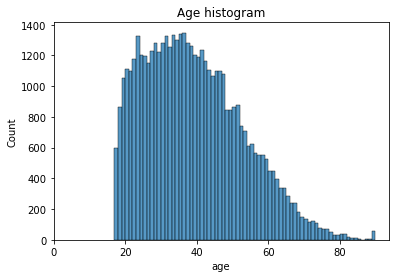

In [8]:
sns.histplot(df.age, binwidth=1)
plt.xlim(left=0)
plt.title("Age histogram")
plt.show()

Age distribution is quite close to normal distribution except it is cut at age=16 (reason explained above). It's peak is around `age=36`.

It seems that all values above 90 were truncated to 90.

### Workclass

In [9]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

It turns out, about 70% of all records have `workclass` set as `Private`.

### Education

Column `education` is already encoded with numbers 1-16 in column `education_num`.

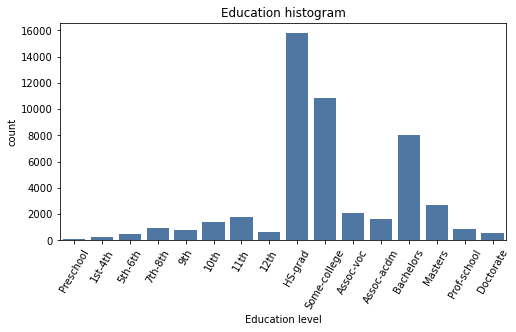

In [10]:
plt.figure(figsize=(8,4))
education_in_order = df[['education_num', 'education']].drop_duplicates().sort_values(by=['education_num'])
g = sns.countplot(x="education_num", data=df, color = '#4276b0');
g.set_xticklabels(labels=education_in_order.education, rotation=60)
plt.title("Education histogram")
plt.xlabel("Education level")
plt.show()

Around 70% of values in `education` column are `HS-grad`, `Some-college` or `Bachelors`. Every other possible value is present in less than 4% of all records.

### Capital gain and loss
Columns `capital_gain` and `capital_loss` consist mostly of zeros, respectively 91% and 95%. At the upper limit of `capital_gain` values there is odd peak of records number. It seems like all values above 100,000 were truncated to 99,999.

Zeros in capital_gain: 0.9173866754023177
Zeros in capital_loss: 0.9532779165472339


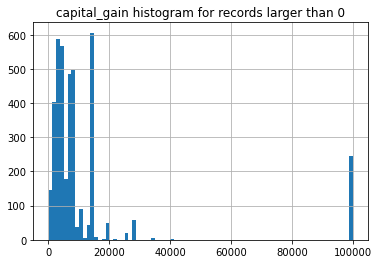

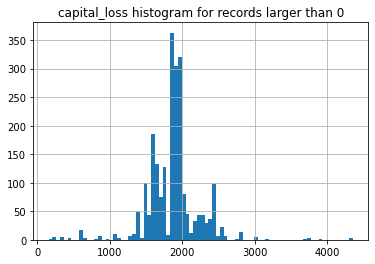

In [11]:
print('Zeros in capital_gain:',df[df['capital_gain'] == 0].shape[0]/df.shape[0])
print('Zeros in capital_loss:',df[df['capital_loss'] == 0].shape[0]/df.shape[0])

df[df['capital_gain']>0]['capital_gain'].hist(bins=80)
plt.title('capital_gain histogram for records larger than 0')
plt.show()
df[df['capital_loss']>0]['capital_loss'].hist(bins=80)
plt.title('capital_loss histogram for records larger than 0')
plt.show()

In [12]:
# all values of capital_gain above 50,000 are 99,999
df[df['capital_gain']> 50000]['capital_gain'].unique()

array([99999.])

## Features distributions vs annual earnings

Distribution of age of people with higher income is shifted to higher values with respect to those with lower income. Very few people with annual earnings higher than $50k are working less than 40h per week.

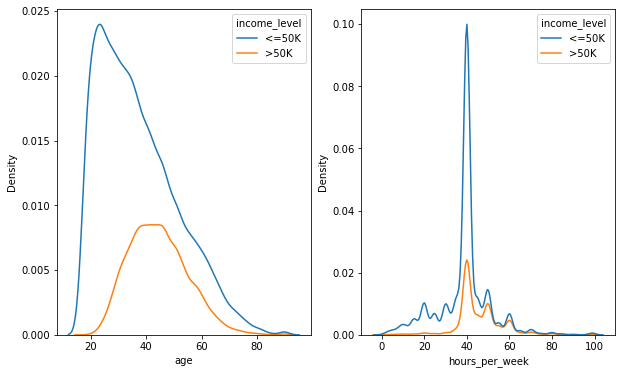

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(10,6))
sns.kdeplot(data=df, x='age', hue='income_level', ax=axs[0])
sns.kdeplot(data=df, x='hours_per_week', hue='income_level', ax=axs[1])
plt.show()

### Shares of >\$50k within different groups
Now, let's examine shares of poeople with higher income within various groups and categories. 24% of records in whole dataset belong to >$50k category, it will be marked with red dotted line on each following plot.

In [14]:
def plot_shares(columns_name):
    x = df.groupby(['income_level', columns_name])['age'].agg(['count'])
    shares = x / x.groupby(level=1).sum()
    fig, ax = plt.subplots()
    g = sns.barplot(data=shares.reset_index().sort_values(by=['income_level','count'],
                                                          ascending=[True,False]), x=columns_name, y='count', hue='income_level')
    fig.set_size_inches(12,7)
    ax.axhline(0.24, ls='--', color='C3')
    plt.xticks(rotation=45)
    plt.ylabel('% of share within X-labeled group')
    plt.title("Incomes among " + columns_name + " groups")
    plt.show()

print("Shares of income catogories within whole dataset:")
df.groupby('income_level')['income_level'].count()/df.shape[0]

Shares of income catogories within whole dataset:


income_level
<=50K    0.760718
>50K     0.239282
Name: income_level, dtype: float64

The higher the education, the higher the income. In particular, when education level is higher than Master, there are more people with higher income than those with lower.

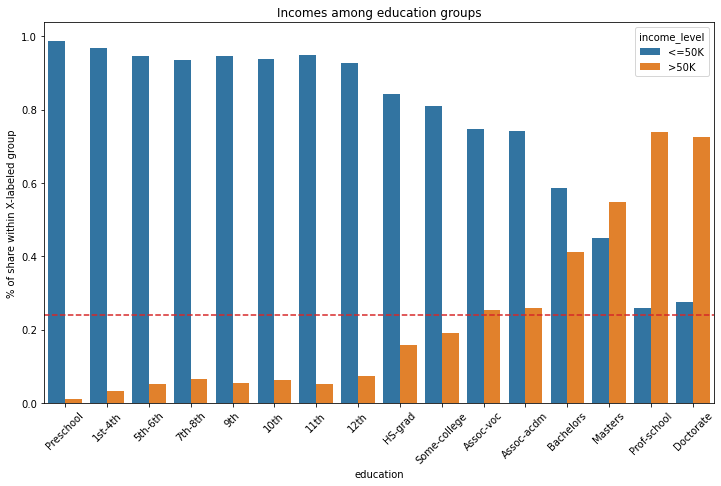

In [15]:
# plottig with preserved chronology of education
x = df.groupby(['income_level', 'education'])['age'].agg(['count'])
shares = x / x.groupby(level=1).sum()
shares = shares.reset_index().merge(education_in_order, on='education').sort_values(by=['education_num'])
fig, ax = plt.subplots()
g = sns.barplot(data=shares, x='education', y='count', hue='income_level')
fig.set_size_inches(12,7)
ax.axhline(0.24, ls='--', color='C3')
plt.xticks(rotation=45)
plt.ylabel('% of share within X-labeled group')
plt.title("Incomes among education groups")
plt.show()

The biggest shares of people with higher income are among married people rather than single ones.

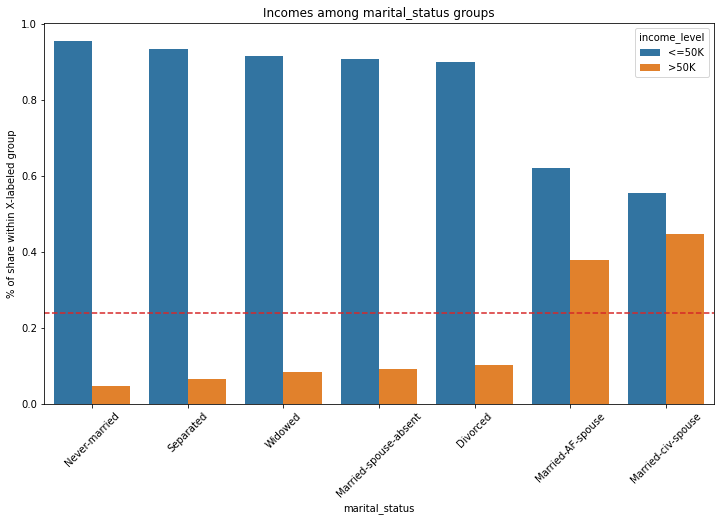

In [16]:
plot_shares('marital_status')

The most people with higher income are among specialist and executive menagers. Also armed forces employees forms group of people which have share of higher income above average.

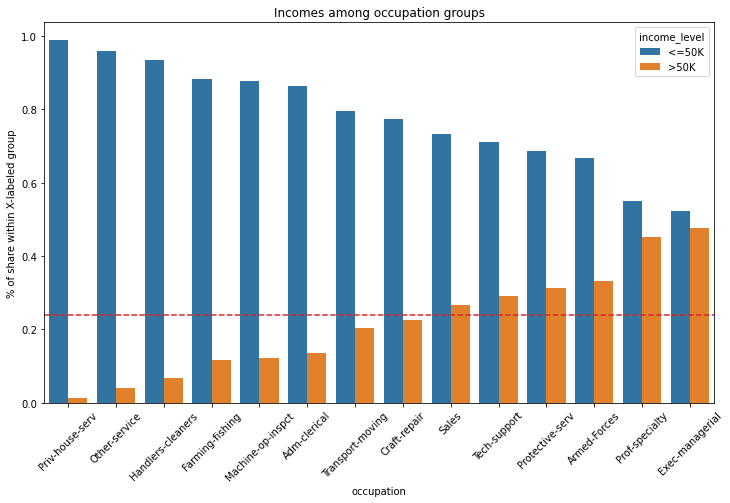

In [17]:
plot_shares('occupation')

White and Asian people earn statistically more than other ethnic groups.

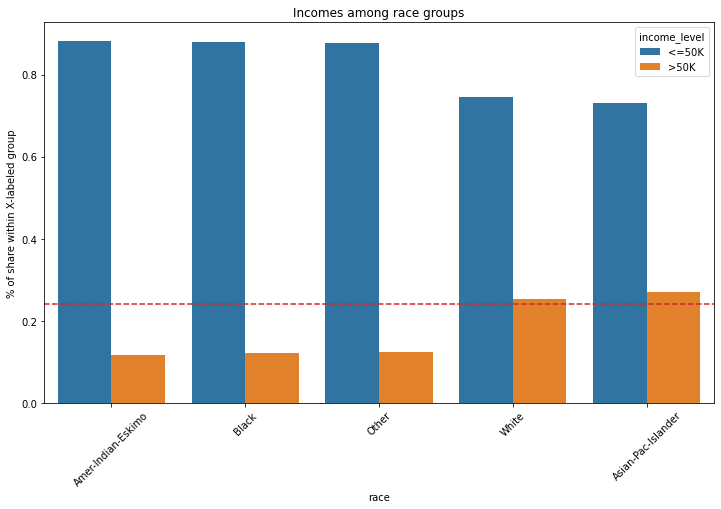

In [18]:
plot_shares('race')

Men earn statistically more than women.

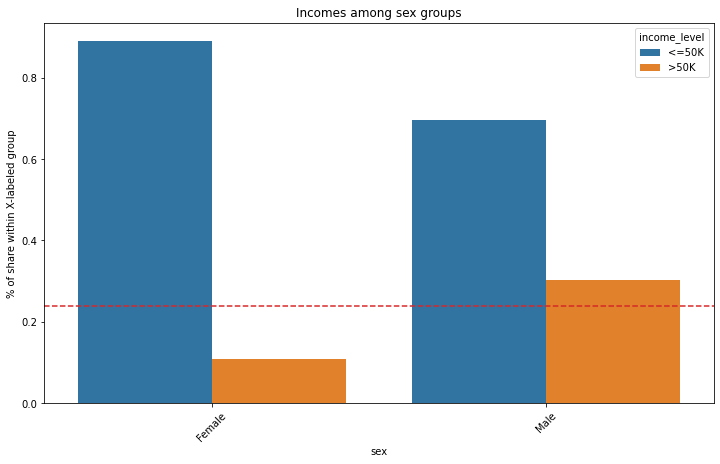

In [19]:
plot_shares('sex')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5f8c4893-64dc-4294-ae33-b67d55ff5ec2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>